In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [212]:
df = pd.read_csv('../../data/DummyData.csv')

In [213]:
df.head()

,sex,age,educational_status,partner_status,employment_status,weight,height,BMI,treatment,EMI,...,nitrate,diuretic,psychotropic,angiotensin2_receptor_blocker,week,steps,mvpa_mins,perception,steps_goal,mvpa_mins_goal
0,1,25,1,0,1,65,177,20.75,0,0,...,0,0,0,0,1,58,0,0,191.0,0.0
1,1,25,1,0,1,65,177,20.75,0,0,...,0,0,0,0,2,191,0,0,0.0,0.0
2,1,25,1,0,1,65,177,20.75,0,0,...,0,0,0,0,3,0,0,0,NaN,NaN
3,0,31,2,1,1,64,172,21.63,0,0,...,0,0,0,0,1,20000,500,10,20000.0,500.0
4,0,31,2,1,1,64,172,21.63,0,0,...,0,0,0,0,2,20000,500,2,20000.0,500.0


In [214]:
df.describe()

,sex,age,educational_status,partner_status,employment_status,weight,height,BMI,treatment,EMI,...,nitrate,diuretic,psychotropic,angiotensin2_receptor_blocker,week,steps,mvpa_mins,perception,steps_goal,mvpa_mins_goal
count,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.0,5.0,...,5.0,5.0,5.0,5.0,5.00000,5.000000,5.000000,5.000000,4.000000,4.000000
mean,0.600000,27.400000,1.400000,0.400000,1.0,64.600000,175.000000,21.102000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.80000,8049.800000,200.000000,2.400000,10047.750000,250.000000
std,0.547723,3.286335,0.547723,0.547723,0.0,0.547723,2.738613,0.481996,0.0,0.0,...,0.0,0.0,0.0,0.0,0.83666,10909.209926,273.861279,4.335897,11492.132972,288.675135
min,0.000000,25.000000,1.000000,0.000000,1.0,64.000000,172.000000,20.750000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,0.000000,1.0,64.000000,172.000000,20.750000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.00000,58.000000,0.000000,0.000000,143.250000,0.000000
50%,1.000000,25.000000,1.000000,0.000000,1.0,65.000000,177.000000,20.750000,0.0,0.0,...,0.0,0.0,0.0,0.0,2.00000,191.000000,0.000000,0.000000,10095.500000,250.000000
75%,1.000000,31.000000,2.000000,1.000000,1.0,65.000000,177.000000,21.630000,0.0,0.0,...,0.0,0.0,0.0,0.0,2.00000,20000.000000,500.000000,2.000000,20000.000000,500.000000
max,1.000000,31.000000,2.000000,1.000000,1.0,65.000000,177.000000,21.630000,0.0,0.0,...,0.0,0.0,0.0,0.0,3.00000,20000.000000,500.000000,10.000000,20000.000000,500.000000


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sex                            5 non-null      int64  
 1   age                            5 non-null      int64  
 2   educational_status             5 non-null      int64  
 3   partner_status                 5 non-null      int64  
 4   employment_status              5 non-null      int64  
 5   weight                         5 non-null      int64  
 6   height                         5 non-null      int64  
 7   BMI                            5 non-null      float64
 8   treatment                      5 non-null      int64  
 9   EMI                            5 non-null      int64  
 10  EAP                            5 non-null      int64  
 11  EPTCA                          5 non-null      int64  
 12  ECABG                          5 non-null      int64  

In [216]:
target_columns = ['steps_goal', 'mvpa_mins_goal']
feature_columns = [col for col in df.columns if col not in target_columns]

In [217]:
feature_columns

['sex',
 'age',
 'educational_status',
 'partner_status',
 'employment_status',
 'weight',
 'height',
 'BMI',
 'treatment',
 'EMI',
 'EAP',
 'EPTCA',
 'ECABG',
 'ECVA_TIA',
 'riskfactor_familyhistory',
 'riskfactor_DM',
 'riskfactor_hypertension',
 'riskfactor_dyslipidemia',
 'riskfactor_smoking',
 'acetylsalicylic_acid',
 'cholesterol_lowering_med',
 'ACE_inhibitor',
 'calcium_blocker',
 'beta_blocker',
 'thienopyridine',
 'oral_anticoagulant',
 'nitrate',
 'diuretic',
 'psychotropic',
 'angiotensin2_receptor_blocker',
 'week',
 'steps',
 'mvpa_mins',
 'perception']

In [218]:
X = df[feature_columns]
y = df[target_columns]

In [219]:
X

,sex,age,educational_status,partner_status,employment_status,weight,height,BMI,treatment,EMI,...,thienopyridine,oral_anticoagulant,nitrate,diuretic,psychotropic,angiotensin2_receptor_blocker,week,steps,mvpa_mins,perception
0,1,25,1,0,1,65,177,20.75,0,0,...,0,0,0,0,0,0,1,58,0,0
1,1,25,1,0,1,65,177,20.75,0,0,...,0,0,0,0,0,0,2,191,0,0
2,1,25,1,0,1,65,177,20.75,0,0,...,0,0,0,0,0,0,3,0,0,0
3,0,31,2,1,1,64,172,21.63,0,0,...,0,0,0,0,0,0,1,20000,500,10
4,0,31,2,1,1,64,172,21.63,0,0,...,0,0,0,0,0,0,2,20000,500,2


In [220]:
y

,steps_goal,mvpa_mins_goal
0,191.0,0.0
1,0.0,0.0
2,NaN,NaN
3,20000.0,500.0
4,20000.0,500.0


In [221]:
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])


/tmp/ipykernel_10794/3191322585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])


In [222]:
data_clean = df.dropna(subset=target_columns)
X_clean = data_clean[feature_columns]
y_clean = data_clean[target_columns]

In [223]:
scaler = StandardScaler()
X_clean[numerical_cols] = scaler.fit_transform(X_clean[numerical_cols])

/tmp/ipykernel_10794/1383459115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean[numerical_cols] = scaler.fit_transform(X_clean[numerical_cols])


In [224]:
numerical_cols

Index(['sex', 'age', 'educational_status', 'partner_status',
       'employment_status', 'weight', 'height', 'BMI', 'treatment', 'EMI',
       'EAP', 'EPTCA', 'ECABG', 'ECVA_TIA', 'riskfactor_familyhistory',
       'riskfactor_DM', 'riskfactor_hypertension', 'riskfactor_dyslipidemia',
       'riskfactor_smoking', 'acetylsalicylic_acid',
       'cholesterol_lowering_med', 'ACE_inhibitor', 'calcium_blocker',
       'beta_blocker', 'thienopyridine', 'oral_anticoagulant', 'nitrate',
       'diuretic', 'psychotropic', 'angiotensin2_receptor_blocker', 'week',
       'steps', 'mvpa_mins', 'perception'],
      dtype='object')

# Correlation Matrix
	for 10 feature wit "steps_goal" and "mvpa_mins_goal"

In [225]:
data_clean = df.dropna(subset=['steps_goal', 'mvpa_mins_goal'])

In [226]:
data_clean

,sex,age,educational_status,partner_status,employment_status,weight,height,BMI,treatment,EMI,...,nitrate,diuretic,psychotropic,angiotensin2_receptor_blocker,week,steps,mvpa_mins,perception,steps_goal,mvpa_mins_goal
0,1,25,1,0,1,65,177,20.75,0,0,...,0,0,0,0,1,58,0,0,191.0,0.0
1,1,25,1,0,1,65,177,20.75,0,0,...,0,0,0,0,2,191,0,0,0.0,0.0
3,0,31,2,1,1,64,172,21.63,0,0,...,0,0,0,0,1,20000,500,10,20000.0,500.0
4,0,31,2,1,1,64,172,21.63,0,0,...,0,0,0,0,2,20000,500,2,20000.0,500.0


In [227]:
data_clean.isna().sum()

sex                              0
age                              0
educational_status               0
partner_status                   0
employment_status                0
weight                           0
height                           0
BMI                              0
treatment                        0
EMI                              0
EAP                              0
EPTCA                            0
ECABG                            0
ECVA_TIA                         0
riskfactor_familyhistory         0
riskfactor_DM                    0
riskfactor_hypertension          0
riskfactor_dyslipidemia          0
riskfactor_smoking               0
acetylsalicylic_acid             0
cholesterol_lowering_med         0
ACE_inhibitor                    0
calcium_blocker                  0
beta_blocker                     0
thienopyridine                   0
oral_anticoagulant               0
nitrate                          0
diuretic                         0
psychotropic        

In [228]:
variance = data_clean.var(numeric_only=True)
non_zero_variance_cols = variance[variance > 0].index
data_clean = data_clean[non_zero_variance_cols]

In [229]:
correlation_matrix = data_clean.corr()

In [230]:
corr_steps = correlation_matrix['steps_goal'].abs().sort_values(ascending=False)
corr_mvpa = correlation_matrix['mvpa_mins_goal'].abs().sort_values(ascending=False)

In [231]:
corr_mvpa

sex                   1.000000
educational_status    1.000000
partner_status        1.000000
mvpa_mins             1.000000
mvpa_mins_goal        1.000000
age                   1.000000
height                1.000000
BMI                   1.000000
weight                1.000000
steps                 0.999989
steps_goal            0.999977
perception            0.727607
week                  0.000000
Name: mvpa_mins_goal, dtype: float64

In [232]:
top_features = pd.concat([corr_steps[1:6], corr_mvpa[1:6]]).index.unique()[:10]
top_features

Index(['age', 'sex', 'partner_status', 'educational_status', 'mvpa_mins_goal',
       'mvpa_mins'],
      dtype='object')

In [233]:
selected_columns = list(top_features) + ['steps_goal', 'mvpa_mins_goal']
corr_subset = correlation_matrix.loc[selected_columns, selected_columns]


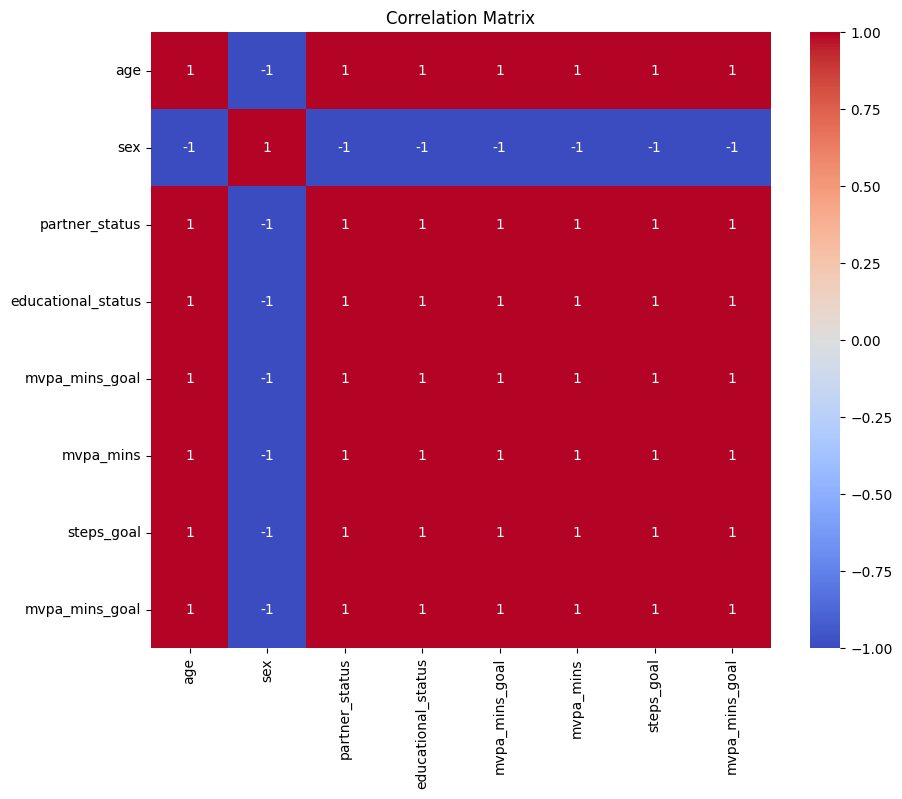

In [234]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

# important feature

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.4, random_state=42)

In [236]:
print("Shape of full data:", X_clean.shape)
print("Shape of test set:", X_test.shape)


Shape of full data: (4, 34)
Shape of test set: (2, 34)


In [237]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

important tabel feature

                          Feature  Importance
0                             sex    0.173077
1                             age    0.173077
3                  partner_status    0.134615
6                          height    0.134615
32                      mvpa_mins    0.115385
2              educational_status    0.096154
31                          steps    0.057692
7                             BMI    0.057692
5                          weight    0.038462
33                     perception    0.019231
10                            EAP    0.000000
11                          EPTCA    0.000000
12                          ECABG    0.000000
13                       ECVA_TIA    0.000000
14       riskfactor_familyhistory    0.000000
4               employment_status    0.000000
8                       treatment    0.000000
9                             EMI    0.000000
17        riskfactor_dyslipidemia    0.000000
16        riskfactor_hypertension    0.000000
15       

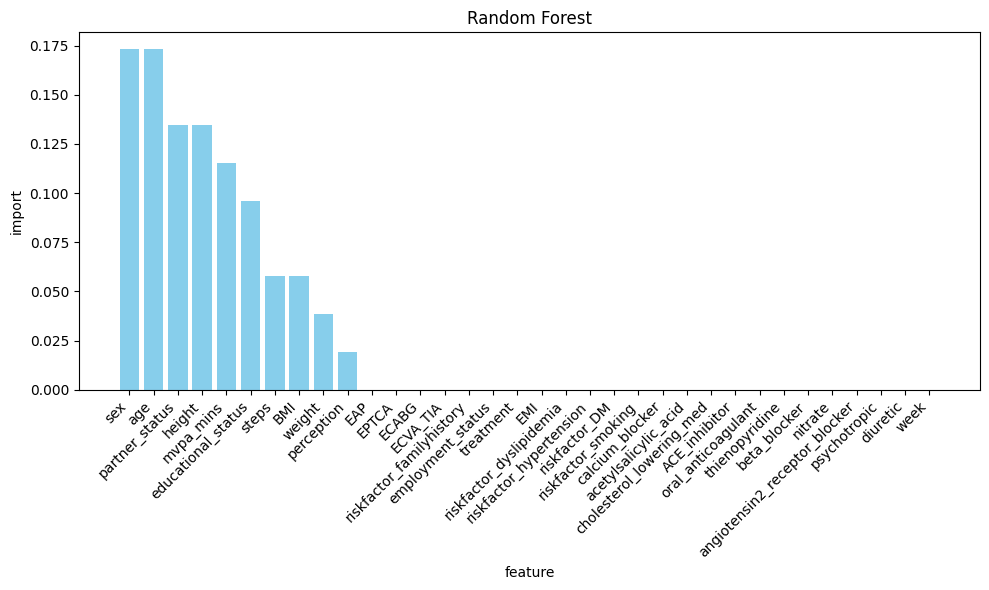

In [238]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


print("important tabel feature\n")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('feature')
plt.ylabel('import')
plt.title('Random Forest')
plt.tight_layout()
plt.show()

In [239]:
models = {
    'Linear Regression': MultiOutputRegressor(LinearRegression()),
    'Ridge Regression': MultiOutputRegressor(Ridge()),
    'Lasso Regression': MultiOutputRegressor(Lasso()),
    'ElasticNet': MultiOutputRegressor(ElasticNet()),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'MLP': MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)),
    'K-Nearest Neighbors': MultiOutputRegressor(KNeighborsRegressor())
}


In [240]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
stacked_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
models['Stacked Ensemble'] = stacked_model

In [241]:

target_specific_results = {}

results = []
for name, model in models.items():
    try:

        model.fit(X_train, y_train)
        

        y_pred = model.predict(X_test)

        rmse_steps = np.sqrt(mean_squared_error(y_test['steps_goal'], y_pred[:, 0]))
        r2_steps = r2_score(y_test['steps_goal'], y_pred[:, 0])
        rmse_mvpa = np.sqrt(mean_squared_error(y_test['mvpa_mins_goal'], y_pred[:, 1]))
        r2_mvpa = r2_score(y_test['mvpa_mins_goal'], y_pred[:, 1])
        
        results.append({
            'Model': name,
            'RMSE_steps_goal': rmse_steps,
            'R2_steps_goal': r2_steps,
            'RMSE_mvpa_mins_goal': rmse_mvpa,
            'R2_mvpa_mins_goal': r2_mvpa
        })
    except Exception as e:
        print(f"Error{name}: {e}")


for target in ['steps_goal', 'mvpa_mins_goal']:
    try:
        rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
        rf_model.fit(X_train, y_train[target])
        y_pred_target = rf_model.predict(X_test)
        
        rmse_target = np.sqrt(mean_squared_error(y_test[target], y_pred_target))
        r2_target = r2_score(y_test[target], y_pred_target)
        
        target_specific_results[target] = {'RMSE': rmse_target, 'R2': r2_target}
    except Exception as e:
        print(f"Target-Specific Model  {target}: {e}")


if results:
    results_df = pd.DataFrame(results)
    print("result the models\n")
    print(results_df)
else:
    print("there isn't any model finish\n")


print("Target-Specific Models:\n")
for target, metrics in target_specific_results.items():
    print(f"{target}: RMSE={metrics['RMSE']:.2f}, R2={metrics['R2']:.2f}")


/home/ali/.cache/pypoetry/virtualenvs/backend-_rtLvpYT-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.703e+01, tolerance: 1.250e+01
  model = cd_fast.enet_coordinate_descent(


ErrorGradient Boosting: y should be a 1d array, got an array of shape (2, 2) instead.


/home/ali/.cache/pypoetry/virtualenvs/backend-_rtLvpYT-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ali/.cache/pypoetry/virtualenvs/backend-_rtLvpYT-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


ErrorK-Nearest Neighbors: Expected n_neighbors <= n_samples_fit, but n_neighbors = 5, n_samples_fit = 2, n_samples = 2
ErrorStacked Ensemble: y should be a 1d array, got an array of shape (2, 2) instead.
result the models

               Model  RMSE_steps_goal  R2_steps_goal  RMSE_mvpa_mins_goal  \
0  Linear Regression      1579.406770       0.975055            39.700418   
1   Ridge Regression      1878.058835       0.964729            46.681504   
2   Lasso Regression       135.644039       0.999816           195.242483   
3         ElasticNet      1878.299908       0.964720            47.237489   
4      Random Forest      4964.822379       0.753505           123.136104   
5        Extra Trees       851.207475       0.992754            21.213203   
6            XGBoost       135.057363       0.999818             0.000957   
7                MLP     13693.776912      -0.875195           122.684832   

   R2_mvpa_mins_goal  
0           0.974782  
1           0.965133  
2           0.